In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv('goodreads_top100_from1980to2023_v2 (1).csv')
data.head()

,Unnamed: 0,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,1,The Name of the Rose,NaN,NaN,Umberto Eco,The year is 1327. Benedictines in a wealthy It...,536.0,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,360732
2,2,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
3,3,Firestarter,NaN,NaN,Stephen King,The Department of Scientific Intelligence (aka...,564.0,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226270
4,4,Cosmos,NaN,NaN,Carl Sagan,The story of fifteen billion years of cosmic e...,384.0,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,144686


In [3]:
# Check for missing values
data.isnull().sum()

Unnamed: 0             0
Book                   0
Series              2171
Release number      2185
Author                 0
Description            3
Num Pages             34
Format                 1
Genres                 0
Publication Date       1
Rating                 0
Number of voters       0
dtype: int64

In [4]:
# Drop NaN
clean_data = data.dropna().reset_index().drop(['index', 'Unnamed: 0'], axis=1)
clean_data.head()

,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
0,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Facing annihilation at the hands of the warlik...,250.0,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,283375
1,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,This novel of awesome beauty and power is a mo...,512.0,Paperback,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,264630
2,The Bourne Identity,Jason Bourne,1,Robert Ludlum,"Who is Jason Bourne? Is he an assassin, a terr...",566.0,Paperback,"['Fiction', 'Thriller', 'Mystery', 'Suspense',...","February 4, 1980",4.05,431083
3,One Corpse Too Many,Chronicles of Brother Cadfael,2,Ellis Peters,"In the summer of 1138, war between King Stephe...",214.0,Mass Market Paperback,"['Mystery', 'Historical Fiction', 'Fiction', '...","June 1, 1979",4.08,16138
4,The Indian in the Cupboard,The Indian in the Cupboard,1,Lynne Reid Banks,"At first, Omri is unimpressed with the plastic...",192.0,Paperback,"['Fantasy', 'Childrens', 'Fiction', 'Young Adu...","January 1, 1980",3.93,105145


In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2194 entries, 0 to 2193
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Book              2194 non-null   object 
 1   Series            2194 non-null   object 
 2   Release number    2194 non-null   object 
 3   Author            2194 non-null   object 
 4   Description       2194 non-null   object 
 5   Num Pages         2194 non-null   float64
 6   Format            2194 non-null   object 
 7   Genres            2194 non-null   object 
 8   Publication Date  2194 non-null   object 
 9   Rating            2194 non-null   object 
 10  Number of voters  2194 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 188.7+ KB


In [6]:
# Summary statistics
clean_data.describe(include='all')

,Book,Series,Release number,Author,Description,Num Pages,Format,Genres,Publication Date,Rating,Number of voters
count,2194,2194,2194,2194,2194,2194.000000,2194,2194,2194,2194,2.194000e+03
unique,2140,1090,101,804,2158,NaN,12,1704,1311,131,NaN
top,Boundary Waters,Chronicles of Brother Cadfael,1,Terry Pratchett,The Quetico-Superior more than two million acr...,NaN,Paperback,"['Fantasy', 'Fiction', 'Young Adult', 'Childre...","January 1, 1992",4.13,NaN
freq,2,19,785,32,2,NaN,730,12,24,55,NaN
mean,NaN,NaN,NaN,NaN,NaN,394.303555,NaN,NaN,NaN,NaN,1.500878e+05
std,NaN,NaN,NaN,NaN,NaN,174.448897,NaN,NaN,NaN,NaN,4.633829e+05
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,1.700000e+01
25%,NaN,NaN,NaN,NaN,NaN,296.000000,NaN,NaN,NaN,NaN,1.635825e+04
50%,NaN,NaN,NaN,NaN,NaN,370.000000,NaN,NaN,NaN,NaN,4.511450e+04
75%,NaN,NaN,NaN,NaN,NaN,456.000000,NaN,NaN,NaN,NaN,1.149145e+05


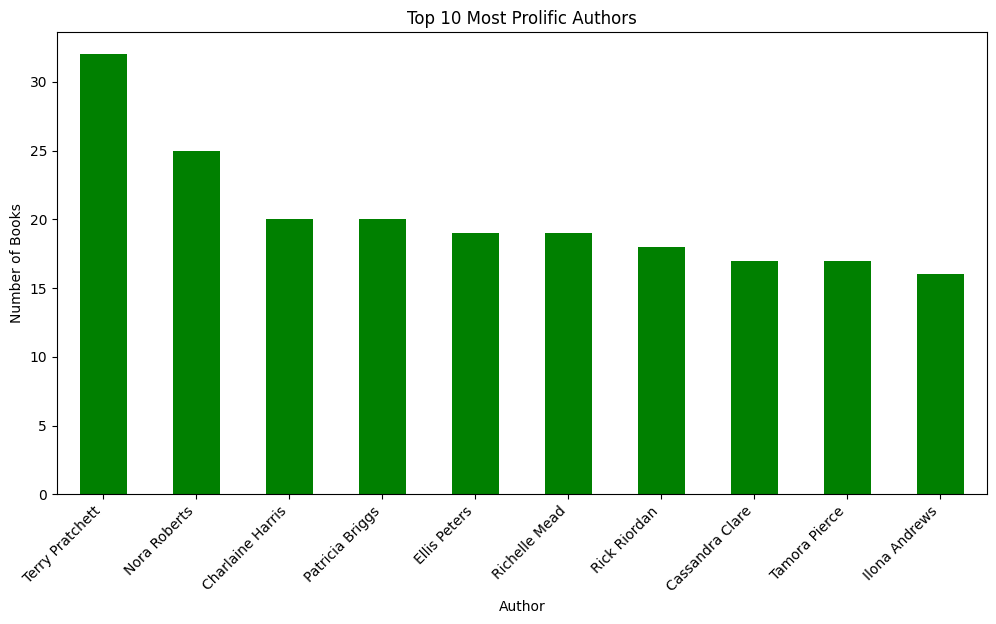

In [7]:
plt.figure(figsize=(12, 6))
clean_data['Author'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()

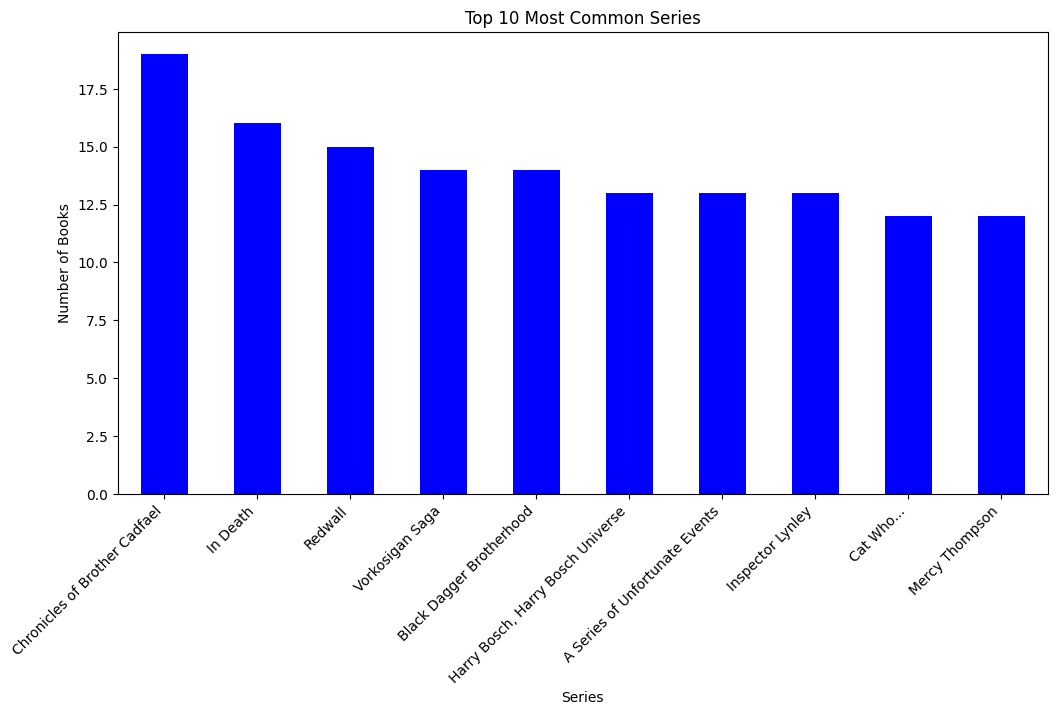

In [8]:
plt.figure(figsize=(12, 6))
clean_data['Series'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Series')
plt.xlabel('Series')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()

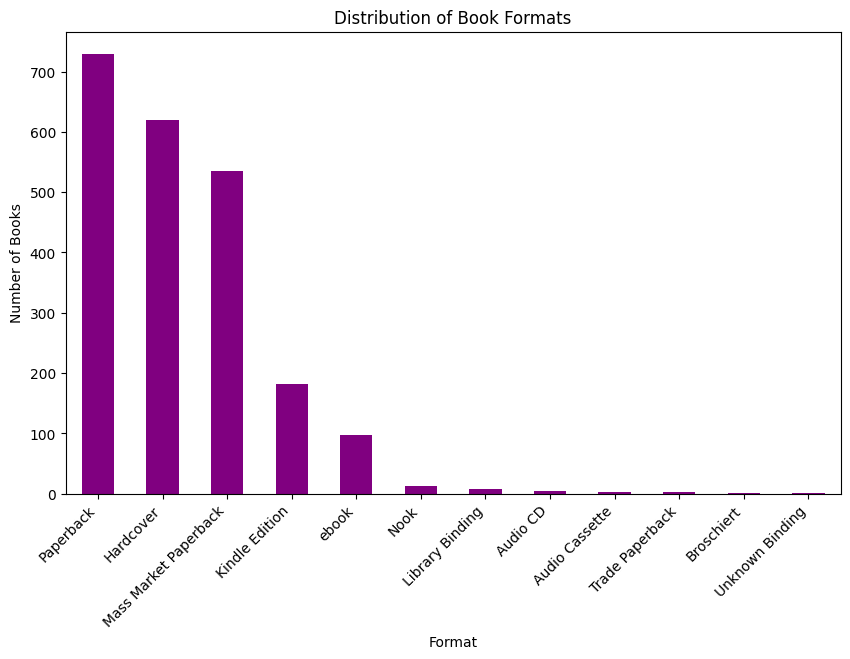

In [9]:
# Distribution of Book Formats by no of books
plt.figure(figsize=(10, 6))
clean_data['Format'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Book Formats')
plt.xlabel('Format')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.show()

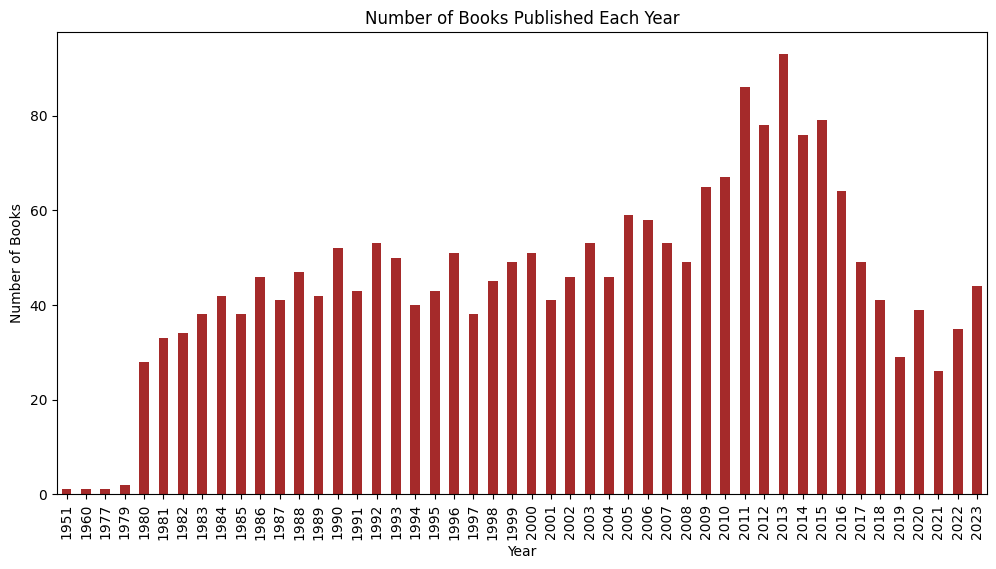

In [10]:
clean_data['Publication Date'] = pd.to_datetime(clean_data['Publication Date'], errors='coerce')

# Remove rows with NaT values (if needed)
clean_data = clean_data.dropna(subset=['Publication Date'])

# Plotting the distribution of books over the years
plt.figure(figsize=(12, 6))
clean_data['Publication Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='brown')
plt.title('Number of Books Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()


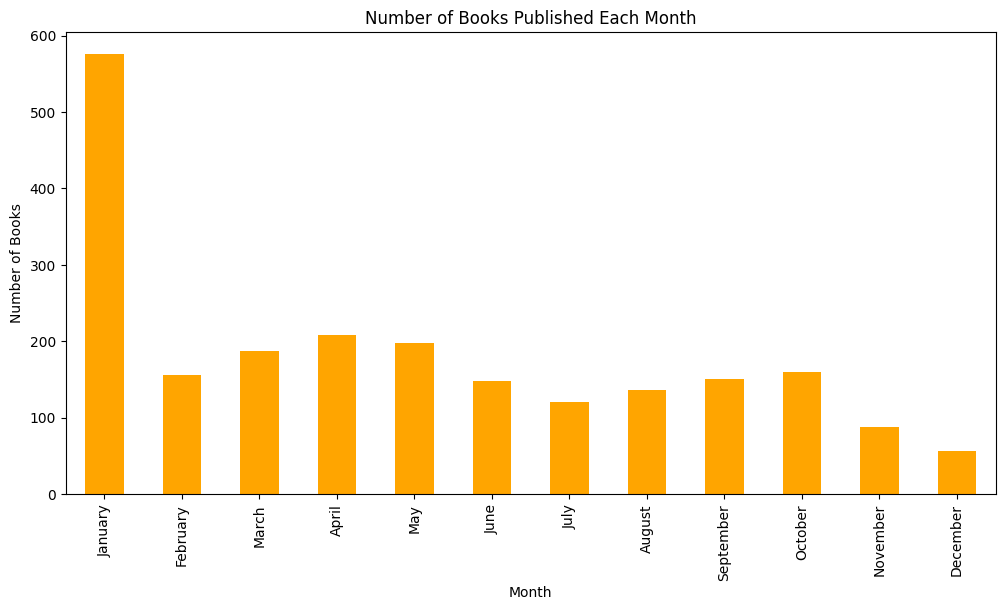

In [11]:
clean_data['Publication Date'] = pd.to_datetime(clean_data['Publication Date'], errors='coerce')

# Extract the month name
clean_data['Publication Month Name'] = clean_data['Publication Date'].dt.strftime('%B')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Publication Month Name' to a categorical variable with defined order
clean_data['Publication Month Name'] = pd.Categorical(clean_data['Publication Month Name'], categories=month_order, ordered=True)

# Plotting the distribution of books over months
plt.figure(figsize=(12, 6))
clean_data['Publication Month Name'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Books Published Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Books')
plt.show()


In [12]:
top_books_by_voters = clean_data.nlargest(10, 'Number of voters')
print(top_books_by_voters[['Book', 'Number of voters']])

                                           Book  Number of voters
731       Harry Potter and the Sorcerer's Stone           9848880
1268                           The Hunger Games           8489255
1105                                   Twilight           6466720
815    Harry Potter and the Prisoner of Azkaban           4081625
1490                                  Divergent           3907387
767     Harry Potter and the Chamber of Secrets           3839870
1209       Harry Potter and the Deathly Hallows           3644829
862         Harry Potter and the Goblet of Fire           3615848
1313                              Catching Fire           3490816
1003  Harry Potter and the Order of the Phoenix           3321848


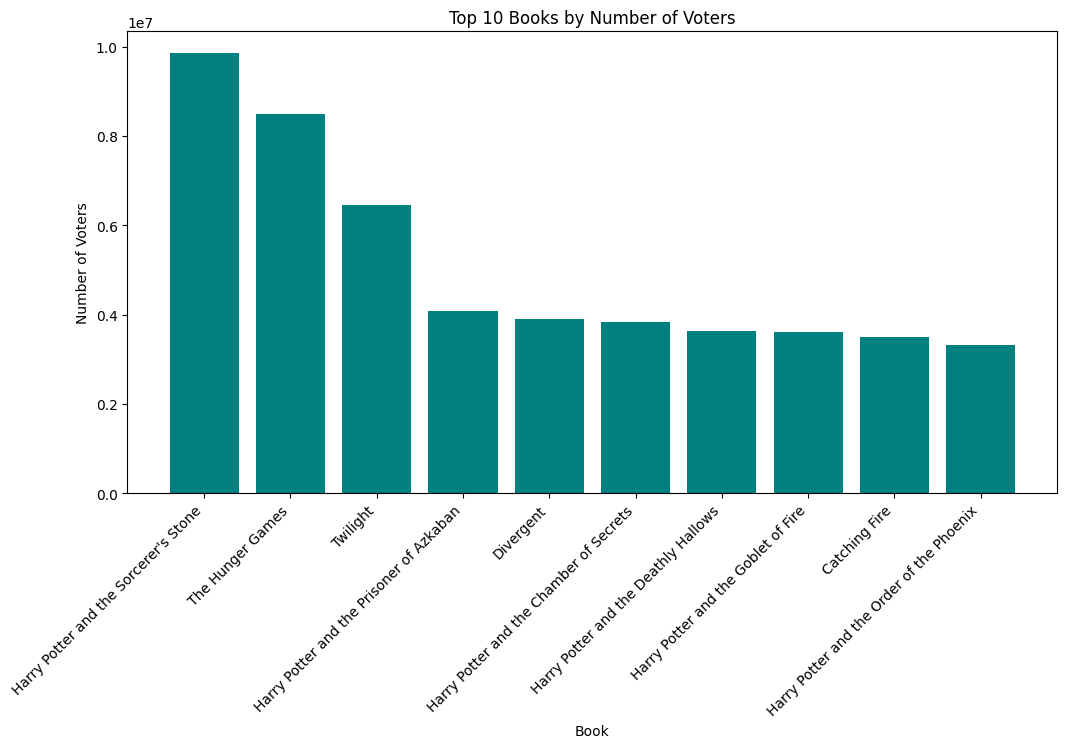

In [13]:
top_books_by_voters = clean_data.nlargest(10, 'Number of voters')

# Plotting the top books by number of voters
plt.figure(figsize=(12, 6))
plt.bar(top_books_by_voters['Book'], top_books_by_voters['Number of voters'], color='teal')
plt.xlabel('Book')
plt.ylabel('Number of Voters')
plt.title('Top 10 Books by Number of Voters')
plt.xticks(rotation=45, ha='right')
plt.show()


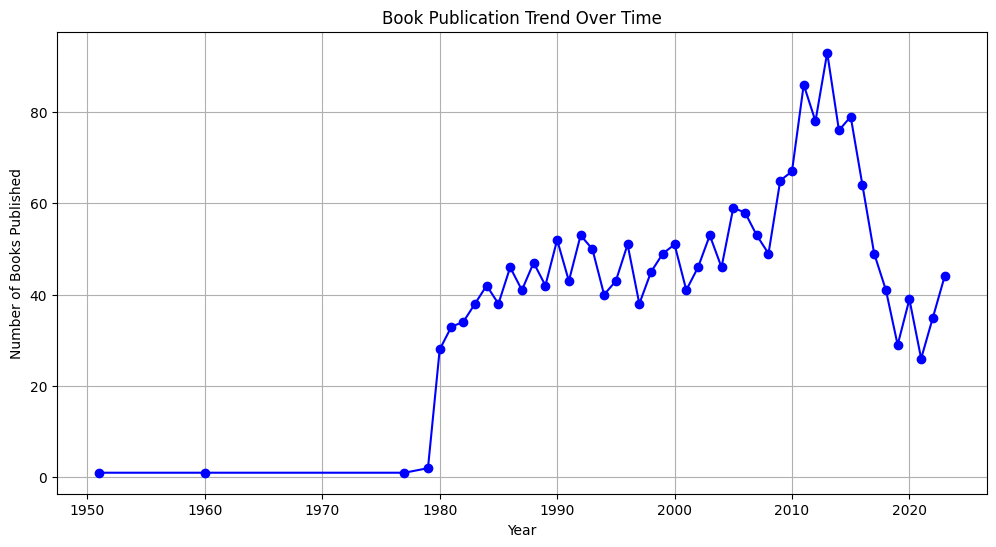

In [14]:
clean_data['Publication Date'] = pd.to_datetime(clean_data['Publication Date'], errors='coerce')

# Extract the year
clean_data['Publication Year'] = clean_data['Publication Date'].dt.year

# Plotting the book publication trend over time
plt.figure(figsize=(12, 6))
clean_data.groupby('Publication Year')['Book'].count().plot(kind='line', marker='o', color='blue')
plt.title('Book Publication Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.grid(True)
plt.show()


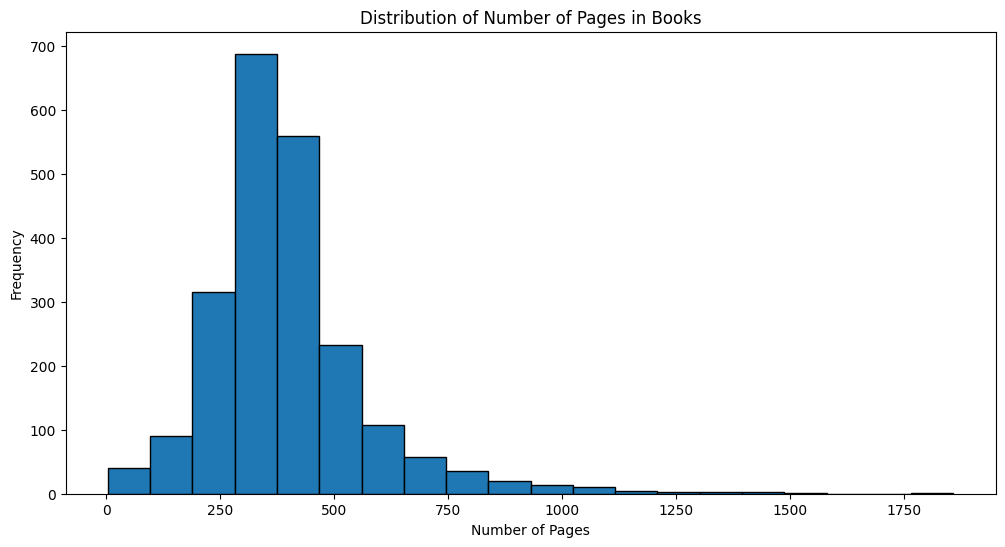

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(clean_data['Num Pages'], bins=20, edgecolor='black')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Pages in Books')
plt.show()
